#Задача 1

#Прв дел

#Симнете ги податочните множества локално
изврши ги следните два блока


In [ ]:
!gdown --id 1mV6kVi_9iHO2cgn-u_q6Lag8IPsAYvLm

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1mV6kVi_9iHO2cgn-u_q6Lag8IPsAYvLm
To: /content/NFLX_market_6.csv
100% 1.89k/1.89k [00:00<00:00, 2.98MB/s]


In [ ]:
!gdown --id 1-8uKr54oJLW6tcVCRlkDrM9-njZFyhhX

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-8uKr54oJLW6tcVCRlkDrM9-njZFyhhX
To: /content/netflix_movies_6.csv
100% 8.04k/8.04k [00:00<00:00, 11.7MB/s]


#Спој ги двете податочни множества

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv("/content/NFLX_market_6.csv")
df2 = pd.read_csv("/content/netflix_movies_6.csv")
print(df1.head())
print(df2.head())

       Date        Open       Close
0  01-04-22  376.799988  373.470001
1  04-04-22  373.549988  391.500000
2  05-04-22  389.299988  380.149994
3  06-04-22  374.149994  368.350006
4  07-04-22  365.000000  362.149994
       Date                                   Title      Genre
0  30-06-22                    Sharkdog (TV Series)  TV Series
1  29-06-22                                 Beauty     Romance
2  29-06-22  Pirate Gold of Adak Island (TV Series)  TV Series
3  29-06-22                 The Upshaws (TV Series)  TV Series
4  28-06-22                                Blasted      Action


In [ ]:
df = pd.merge(df2, df1, on='Date')
df.head()

,Date,Title,Genre,Open,Close
0,29-06-22,Beauty,Romance,179.550003,178.360001
1,29-06-22,Pirate Gold of Adak Island (TV Series),TV Series,179.550003,178.360001
2,29-06-22,The Upshaws (TV Series),TV Series,179.550003,178.360001
3,28-06-22,Blasted,Action,189.199997,179.600006
4,28-06-22,Cristela Alonzo: Middle Classy (TV),Documentary,189.199997,179.600006


#Направи визуелизација на таргет колоната

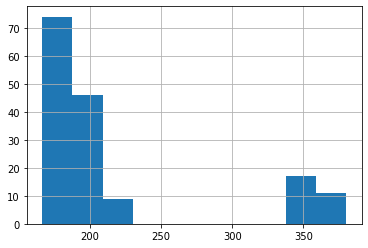

In [ ]:
df['Close'].hist()

#Изврши статистика за колоните

In [ ]:
df.describe()

,Open,Close
count,157.000000,157.000000
mean,219.364712,218.772930
std,67.795747,66.826323
min,163.960007,166.369995
25%,179.550003,180.970001
50%,189.169998,188.320007
75%,202.089996,204.009995
max,389.299988,380.149994


#Претпроцесирај ги текстуалните податоци

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
encoder = LabelEncoder()
df['Genre'] = encoder.fit_transform(df['Genre'])

In [ ]:
vectorizer = CountVectorizer()
vecs = pd.DataFrame(vectorizer.fit_transform(df['Title']).todense().tolist(), columns=vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df = df.drop(columns=['Title'])
df = pd.concat([df, vecs], axis=1)
df.head()

,Date,Genre,Open,Close,10½,1958,245,365,42,abercrombie,...,williams,with,word,world,wrath,yakamoz,yaksha,year,you,your
0,29-06-22,5,179.550003,178.360001,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,29-06-22,7,179.550003,178.360001,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,29-06-22,7,179.550003,178.360001,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,28-06-22,0,189.199997,179.600006,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28-06-22,3,189.199997,179.600006,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Подели го податочното множество за тренирање и тестирање

In [ ]:
from sklearn.model_selection import train_test_split
df = df.drop(columns=['Date'])
x = df.drop(columns=['Close'])
X_train, X_test, Y_train, Y_test = train_test_split(x,  df['Close'], test_size=0.2)

#Одреди кои ќе ти бидат влезни податоци и објасни зошто

Влезни податоци се Genre, Open и ембедираниот текст од насловот. Датумот не нуди значајни податоци за close па го drop. Направив drop пред train test бидејќи е полесно на dataframe

In [ ]:
X_train.shape

(125, 368)

#Изгради модел и тренирај го

добро би било и да се скалираат и податоците за open и close бидејќи не следат нормална распределба

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, Y_train)

In [ ]:
Y_pred = model.predict(X_test)

#Тестирај го моделот со помош на соодветна метрика за евалуација

In [ ]:
# r squared so treniracko
model.score(X_train, Y_train)

1.0

In [ ]:
# r squared so testirachko
model.score(X_test, Y_test)

0.9806398569603928

одлични резултати за r squared

#Bтор дел
Изврши web crawling со цел да го добиеш истото податочно множество како netflix_movies_6.csv

In [ ]:
#Note: Imports for the modules that we need
import numpy as np
import pandas as pd

#Note: Requests is a simple, yet elegant, HTTP library.
#Resource: https://pypi.org/project/requests/
import requests

#Note: Beautiful Soup is a library that makes it easy to scrape information from web pages. 
#Note: In the following resource you can find a way to select any part of a HTML content.
#Resource: https://pypi.org/project/beautifulsoup4/
from bs4 import BeautifulSoup

#Note: IPython is a command shell for interactive computing in Python.
#Note: IPython.display is a module for display tools in IPython.
#Resource: https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html
from IPython.display import HTML

In [ ]:
response = requests.get('https://www.filmaffinity.com/us/rdcat.php?id=new_netflix&date=2022-05')
html = BeautifulSoup(response.text, "html.parser")

In [ ]:
movies = html.select(".top-movie")
len(movies)

172

In [ ]:
data = []
for movie in movies:
  title = movie.select_one("h3").select_one('a').text
  date = movie.select_one('.date').text
  genre = movie.select_one('.genre').text
  obj = {'Date':date, 'Title':title, 'Genre': genre}
  data.append(obj)

In [ ]:
movies_df = pd.DataFrame(data)
movies_df.head()

,Date,Title,Genre
0,"June 30, 2022",Sharkdog (TV Series),TV Series
1,"June 29, 2022",Beauty,Romance
2,"June 29, 2022",Pirate Gold of Adak Island (TV Series),TV Series
3,"June 29, 2022",The Upshaws (TV Series),TV Series
4,"June 28, 2022",Blasted,Action


In [ ]:
movies_df.to_csv("/content/output.csv")